In [2]:
import pandas as pd
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [3]:
# import data in the form of html
URL="https://en.wikipedia.org/wiki/Logistic_regression"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(URL)


In [4]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
table=soup.find('table',{'class':"wikitable"})

In [5]:
df=pd.read_html(str(table))
# convert list to dataframe
df=pd.DataFrame(df[0])
print(df.head())

           0    1     2    3     4    5     6     7    8     9   ...    11  \
0  Hours (xk)  0.5  0.75  1.0  1.25  1.5  1.75  1.75  2.0  2.25  ...  2.75   
1   Pass (yk)  0.0  0.00  0.0  0.00  0.0  0.00  1.00  0.0  1.00  ...  1.00   

    12    13   14   15    16   17    18   19   20  
0  3.0  3.25  3.5  4.0  4.25  4.5  4.75  5.0  5.5  
1  0.0  1.00  0.0  1.0  1.00  1.0  1.00  1.0  1.0  

[2 rows x 21 columns]


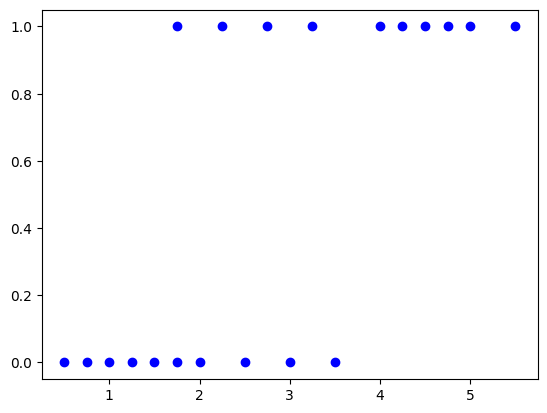

In [8]:
Hour = df.iloc[0,1:len(df.columns)].values
Pass = df.iloc[1,1:len(df.columns)].values

plt.plot(Hour,Pass,'bo')


In [9]:
Hour = Hour[:, np.newaxis]

In [10]:
# Criação do modelo, treinamento e visualização dos coeficientes
modelo = LogisticRegression()
modelo.fit(Hour, Pass)
modelo.coef_
modelo.intercept_

ValueError: Unknown label type: 'unknown'